In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import prophet
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Importing plotly failed. Interactive plots will not work.


In [2]:
col_list=["date","new_deaths","positive_rate"]
dataset = pd.read_csv("new deaths dataset.csv",usecols=col_list)
dataset.describe()

,new_deaths,positive_rate
count,500.000000,500.000000
mean,1.646000,0.068814
std,3.354876,0.061634
min,0.000000,0.000000
25%,0.000000,0.023000
50%,0.000000,0.045000
75%,2.000000,0.100000
max,28.000000,0.319000


In [3]:
my_df_final = dataset.reset_index()[['date','new_deaths']].rename({'date':'ds','new_deaths':'y'} , axis='columns')

In [4]:
train= my_df_final.iloc[:-50]
test= my_df_final.iloc[-50:]
print(train.shape,test.shape)

(450, 2) (50, 2)


In [5]:
from prophet import Prophet

In [6]:
m= Prophet(interval_width=0.95)

In [7]:
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=50)
future.tail()

,ds
495,2021-07-22
496,2021-07-23
497,2021-07-24
498,2021-07-25
499,2021-07-26


In [9]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
495,2021-07-22,0.609031,-5.974565,7.162694
496,2021-07-23,0.769626,-5.547607,7.640371
497,2021-07-24,1.263301,-5.062771,8.205965
498,2021-07-25,1.140810,-5.249430,8.302155
499,2021-07-26,0.696173,-6.349206,7.023653


<AxesSubplot:xlabel='ds'>

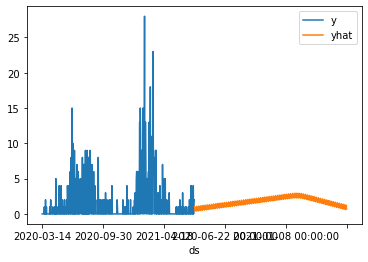

In [10]:
pd.concat([my_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [11]:
from sklearn.metrics import mean_absolute_error
mae_new_deaths=mean_absolute_error(my_df_final['y'],forecast['yhat'])
print('Mean absolute error of new cases is:',mae_new_deaths)

Mean absolute error of new cases is: 2.1999695360684637
